<a href="https://colab.research.google.com/github/amulyamallepula/Datascience/blob/main/amulya_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("u1273.csv")

In [ ]:
df.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time
0,1554205098098,1,q5499,a,10000
1,1554205124417,2,q938,c,21000
2,1554205169041,3,q6753,a,40000
3,1554205192118,4,q4115,b,18000
4,1554205217531,5,q8400,a,21000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     13459 non-null  int64 
 1   solving_id    13459 non-null  int64 
 2   question_id   13459 non-null  object
 3   user_answer   13457 non-null  object
 4   elapsed_time  13459 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 525.9+ KB


In [ ]:
df.describe()

,timestamp,solving_id,elapsed_time
count,1.345900e+04,13459.000000,13459.000000
mean,1.565831e+12,4349.696263,17176.332194
std,1.902131e+09,2644.881446,13153.294871
min,1.554205e+12,1.000000,1000.000000
25%,1.564126e+12,2026.500000,6000.000000
50%,1.565852e+12,4052.000000,16000.000000
75%,1.567230e+12,6610.500000,23000.000000
max,1.569642e+12,9043.000000,170333.000000


In [ ]:
df.isnull().sum()

timestamp       0
solving_id      0
question_id     0
user_answer     2
elapsed_time    0
dtype: int64

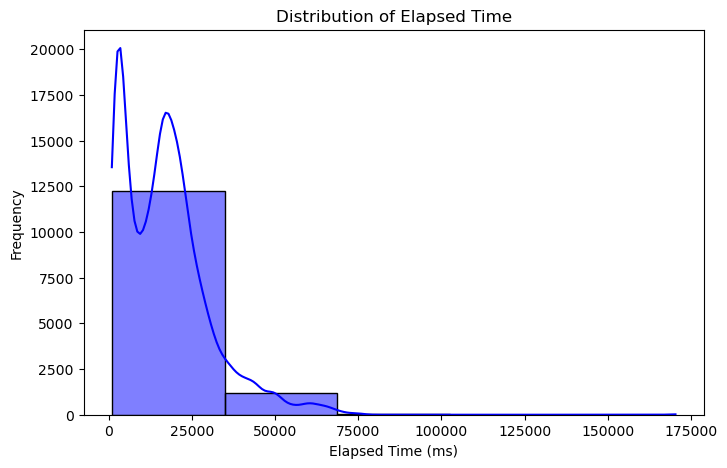

In [ ]:
# Histogram of elapsed time
plt.figure(figsize=(8, 5))
sns.histplot(df["elapsed_time"], bins=5, kde=True, color="blue")
plt.title("Distribution of Elapsed Time")
plt.xlabel("Elapsed Time (ms)")
plt.ylabel("Frequency")
plt.show()


KeyboardInterrupt



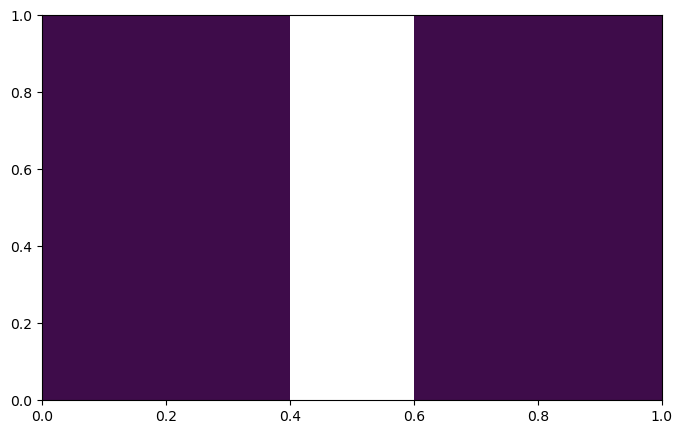

In [ ]:
# Bar chart of question frequency
plt.figure(figsize=(8, 5))
sns.countplot(x=df["question_id"], palette="viridis")
plt.title("Number of Answers per Question")
plt.xlabel("Question ID")
plt.ylabel("Count")
plt.show()

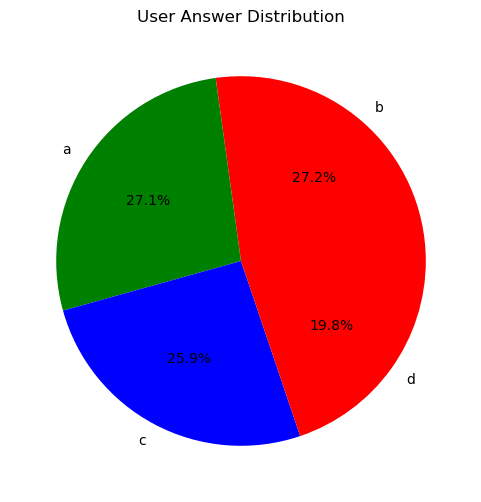

In [ ]:
# Pie chart of user answer distribution
plt.figure(figsize=(6, 6))
df["user_answer"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "green", "blue"])
plt.title("User Answer Distribution")
plt.ylabel("")  # Hide y-label for clarity
plt.show()

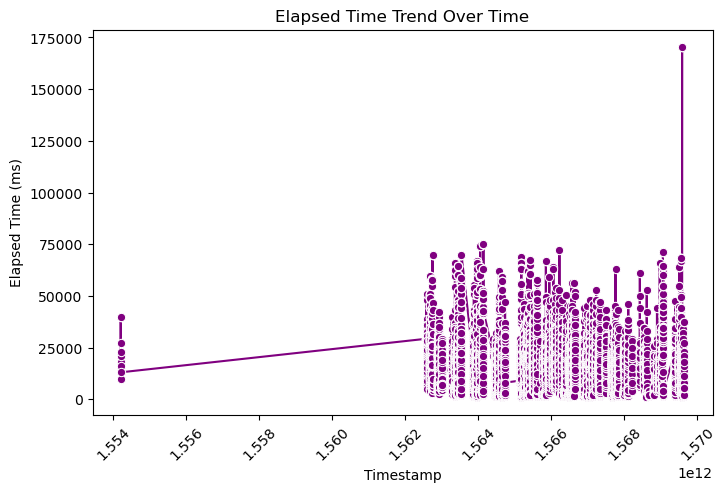

In [ ]:
# Line plot of elapsed time trend over time
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["timestamp"], y=df["elapsed_time"], marker="o", color="purple")
plt.title("Elapsed Time Trend Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Elapsed Time (ms)")
plt.xticks(rotation=45)
plt.show()

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

# Step 2: Load and Inspect Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("personalized_learning_dataset.csv")
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the shape of the dataset
print("\n Dataset shape (rows, columns):")
print(df.shape)

# General info (column names, data types, non-null counts)
print("\n Dataset Info:")
print(df.info())

# Descriptive statistics for numerical columns
print("\n Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n Missing Values per Column:")
print(df.isnull().sum())

First 5 rows of the dataset:
  Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   

# Step 3: Tailored EDA for Personalized Learning & Dropout Insights

In [ ]:
# Set visual theme
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

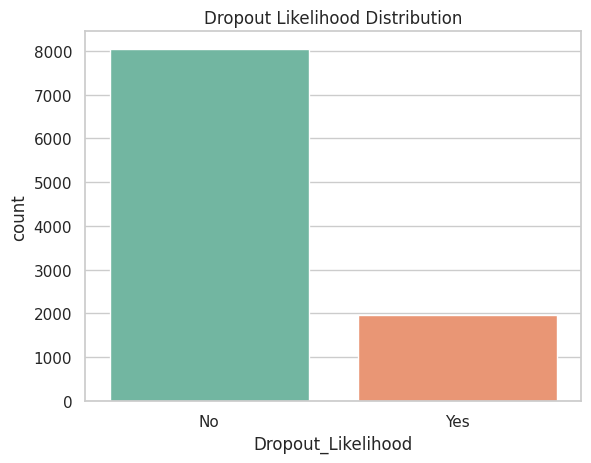

In [ ]:
sns.countplot(x='Dropout_Likelihood', data=df, palette='Set2')
plt.title("Dropout Likelihood Distribution")
plt.show()

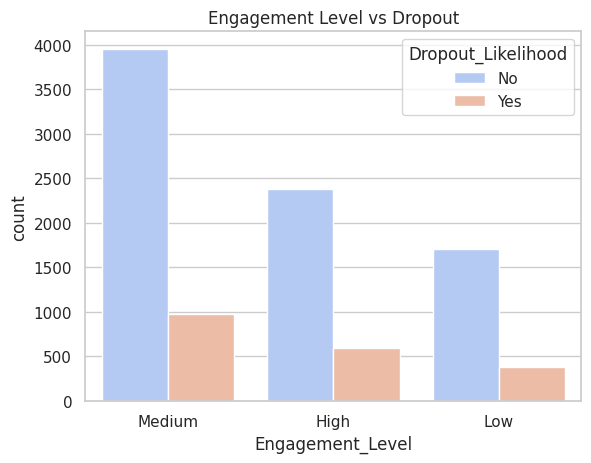

In [ ]:
sns.countplot(x='Engagement_Level', hue='Dropout_Likelihood', data=df, palette='coolwarm')
plt.title("Engagement Level vs Dropout")
plt.show()

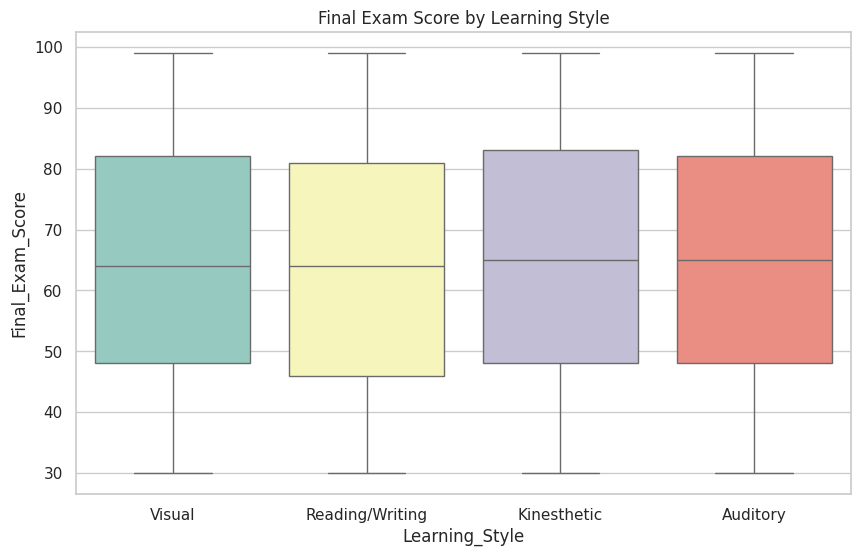

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Learning_Style', y='Final_Exam_Score', data=df, palette='Set3')
plt.title("Final Exam Score by Learning Style")
plt.show()

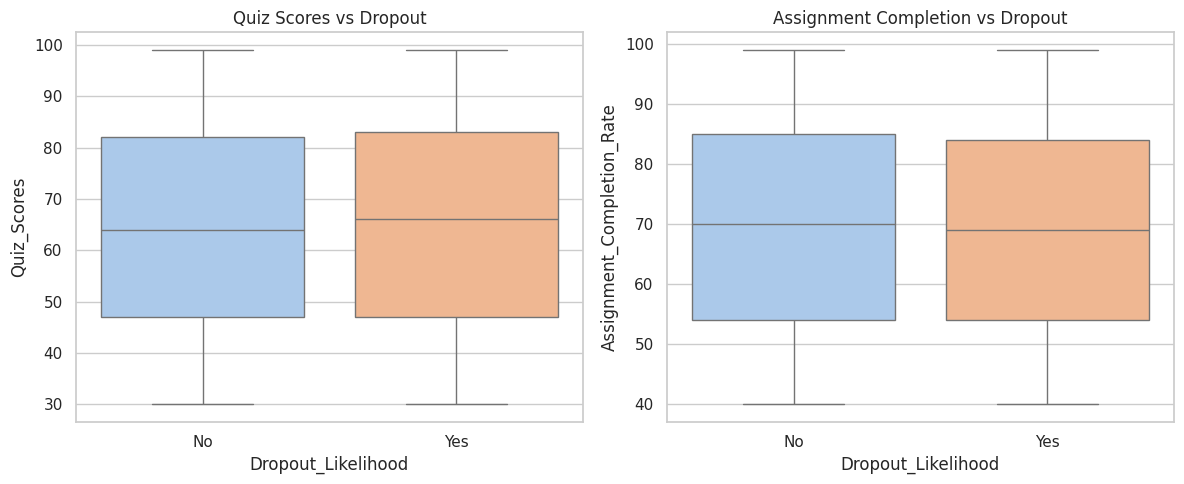

In [ ]:
# Quiz Scores & Assignment Completion vs Dropout
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Dropout_Likelihood', y='Quiz_Scores', data=df, palette='pastel')
plt.title("Quiz Scores vs Dropout")

plt.subplot(1, 2, 2)
sns.boxplot(x='Dropout_Likelihood', y='Assignment_Completion_Rate', data=df, palette='pastel')
plt.title("Assignment Completion vs Dropout")

plt.tight_layout()
plt.show()

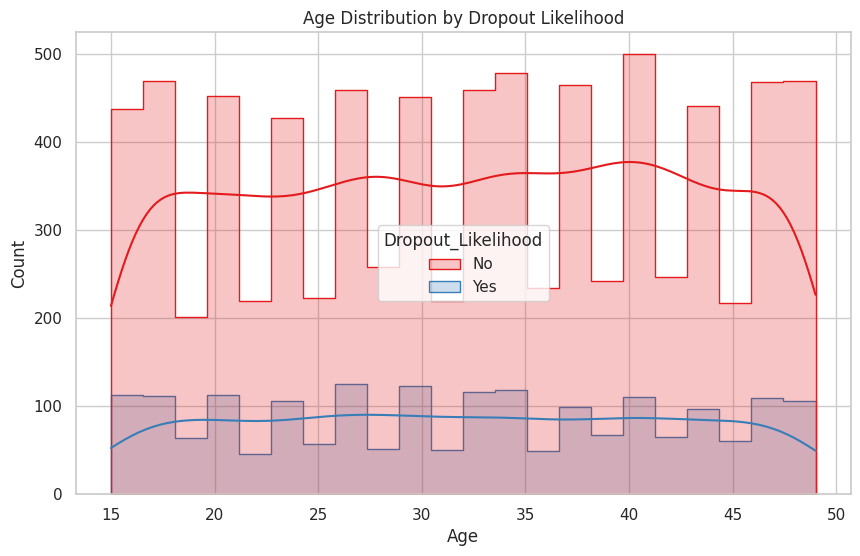

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Dropout_Likelihood', kde=True, element='step', palette='Set1')
plt.title("Age Distribution by Dropout Likelihood")
plt.show()

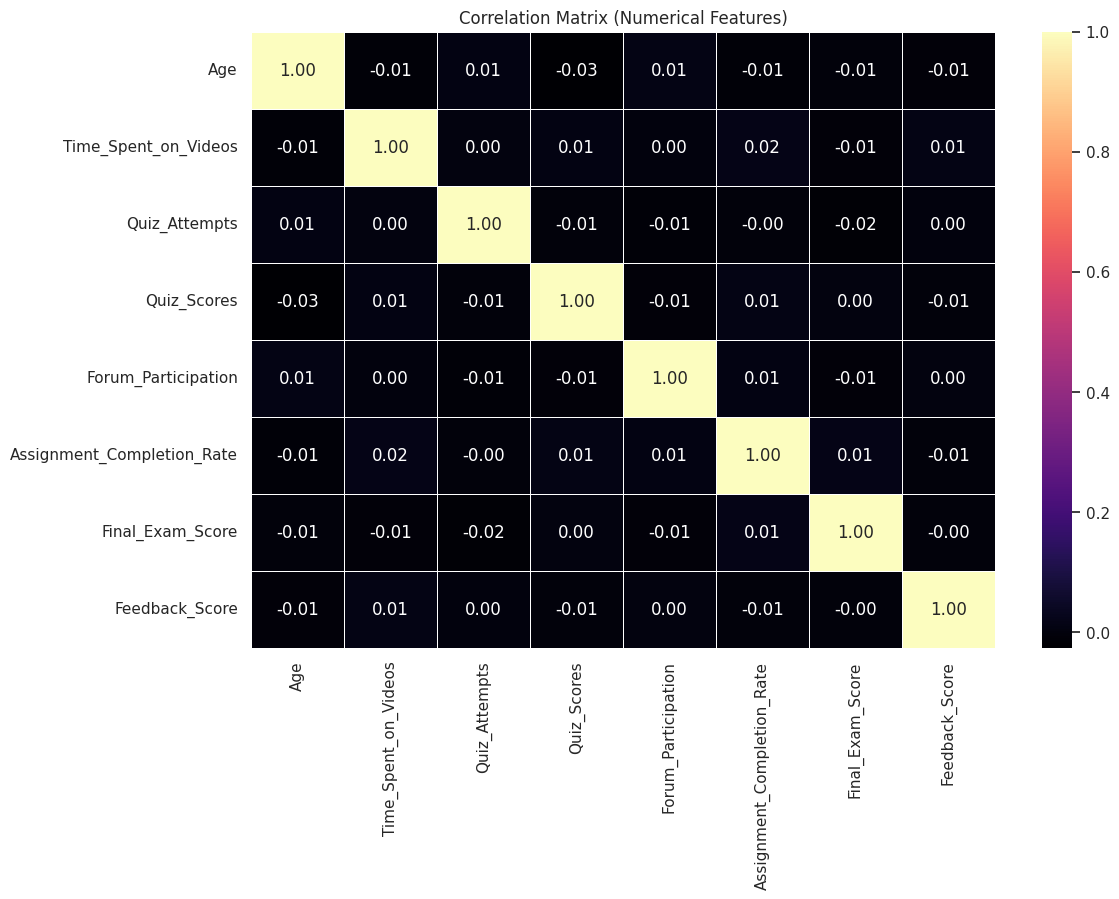

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

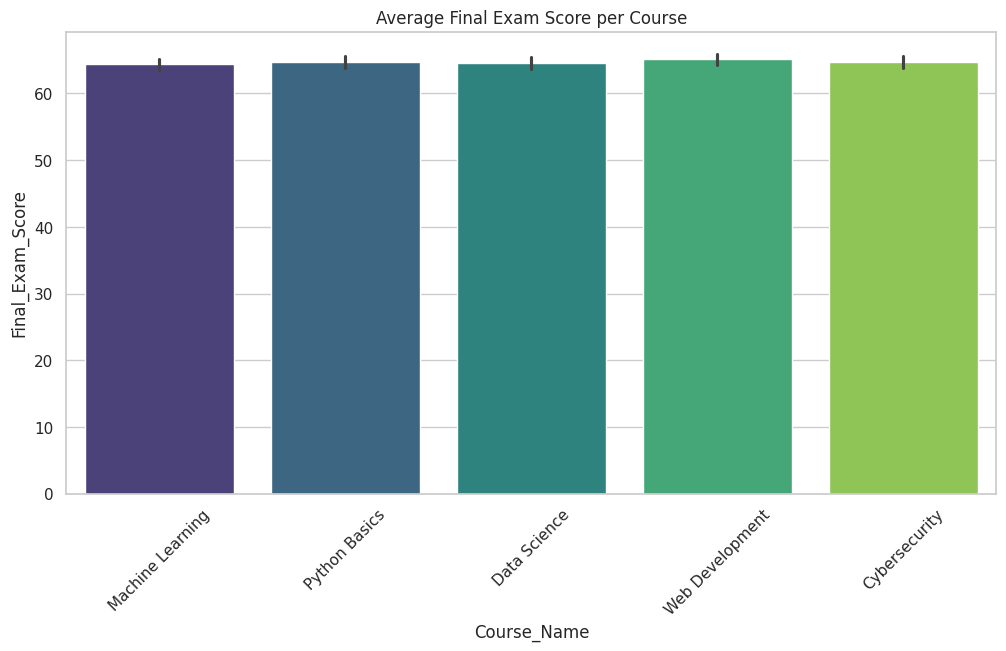

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Course_Name', y='Final_Exam_Score', data=df, estimator=np.mean, palette='viridis')
plt.title("Average Final Exam Score per Course")
plt.xticks(rotation=45)
plt.show()

# Step 4: Data Preprocessing & Feature Engineering

In [ ]:
# --------------------------------------
# 1. Safety Check for Missing Values
# --------------------------------------
# This is not necessary now, but good to include for robustness
df = df.dropna()

In [ ]:
# --------------------------------------
# 2. Encode Categorical Variables
# --------------------------------------
categorical_cols = ['Gender', 'Education_Level', 'Course_Name',
                    'Engagement_Level', 'Learning_Style', 'Dropout_Likelihood']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for inverse transform later

In [ ]:
# --------------------------------------
# 3. Feature Engineering
# --------------------------------------

# 🔹 Interaction Feature: Engagement per Quiz Attempt
df['Engagement_per_Attempt'] = df['Forum_Participation'] / (df['Quiz_Attempts'] + 1)

# 🔹 Engagement Efficiency: Video time vs. Assignment Completion
df['Video_Efficiency'] = df['Assignment_Completion_Rate'] / (df['Time_Spent_on_Videos'] + 1)

# Clip outliers if needed
df['Engagement_per_Attempt'] = df['Engagement_per_Attempt'].clip(upper=20)
df['Video_Efficiency'] = df['Video_Efficiency'].clip(upper=1)

In [ ]:
# --------------------------------------
# 4. Feature Scaling (for certain models)
# --------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = [
    'Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
    'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score',
    'Feedback_Score', 'Engagement_per_Attempt', 'Video_Efficiency'
]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Engagement_per_Attempt,Video_Efficiency
0,S00001,-1.703186,0,0,2,-0.595664,1.335755,0.119351,-1.578287,1.120582,2,-0.681598,3,-1.415976,0,-1.376431,0.421370
1,S00002,1.675816,1,2,3,-0.701559,1.335755,-0.028519,-1.717858,1.408601,2,1.358668,2,1.398246,0,-1.450774,0.701141
2,S00003,-1.206274,0,2,3,-0.270918,-0.445845,-0.472129,-1.578287,-0.146706,2,-0.980174,2,-1.415976,0,-1.326869,-0.301778
3,S00004,0.483227,0,2,1,1.649317,-1.336646,0.020771,1.282926,-0.549934,0,-0.283498,3,0.694691,0,2.266378,-0.938149
4,S00005,0.185080,0,1,3,1.698735,0.444955,-0.274969,0.654855,1.062978,2,1.408431,3,-0.008865,0,0.129016,-0.750176


In [ ]:
df.tail()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood,Engagement_per_Attempt,Video_Efficiency
9995,S09996,-0.609979,0,2,2,-0.659201,-0.445845,1.105150,0.166355,0.198918,2,0.164366,1,-0.712420,0,0.221944,0.181853
9996,S09997,0.483227,1,1,2,1.352810,-0.445845,-1.260768,-1.020001,-0.089102,2,-0.930411,2,-1.415976,1,-0.831249,-0.837175
9997,S09998,0.781374,0,1,2,-1.061603,1.335755,-0.718579,-0.112788,-1.644409,0,-0.034685,3,-1.415976,0,-0.595829,-0.028310
9998,S09999,1.178904,1,0,3,-0.073247,-0.445845,0.957280,1.003783,0.890166,2,-1.328512,3,-0.712420,0,0.965375,-0.170335
9999,S10000,0.681992,0,2,2,-0.595664,-0.445845,1.154440,-1.159573,-0.031498,2,1.607481,3,-0.712420,0,-0.955154,0.021151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  10000 non-null  object 
 1   Age                         10000 non-null  float64
 2   Gender                      10000 non-null  int64  
 3   Education_Level             10000 non-null  int64  
 4   Course_Name                 10000 non-null  int64  
 5   Time_Spent_on_Videos        10000 non-null  float64
 6   Quiz_Attempts               10000 non-null  float64
 7   Quiz_Scores                 10000 non-null  float64
 8   Forum_Participation         10000 non-null  float64
 9   Assignment_Completion_Rate  10000 non-null  float64
 10  Engagement_Level            10000 non-null  int64  
 11  Final_Exam_Score            10000 non-null  float64
 12  Learning_Style              10000 non-null  int64  
 13  Feedback_Score              1000

# Step 5: Define Features and Target

In [ ]:
# Step 4: Define Features (X) and Target (y)

# Define the features (X) - we exclude 'Student_ID' as it's a non-informative column
X = df.drop(['Student_ID', 'Dropout_Likelihood'], axis=1)

# Define the target (y) - this is what we're trying to predict
y = df['Dropout_Likelihood']

# Step 6: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the splits
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (8000, 15), y_train = (8000,)
Testing set shape: X_test = (2000, 15), y_test = (2000,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data (X_train and y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after applying SMOTE
print("Original class distribution (y_train):")
print(y_train.value_counts())

print("\nClass distribution after SMOTE (y_train_smote):")
print(pd.Series(y_train_smote).value_counts())

Original class distribution (y_train):
Dropout_Likelihood
0    6420
1    1580
Name: count, dtype: int64

Class distribution after SMOTE (y_train_smote):
Dropout_Likelihood
0    6420
1    6420
Name: count, dtype: int64


# Step 7: Train Multiple Baseline ML Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model using the resampled training data
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Save the results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': clf_report,
        'confusion_matrix': confusion
    }

    # Print evaluation results
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{confusion}")
    print(f"Classification Report for {model_name}:\n{clf_report}")
    print("="*50)

# save results for further analysis
# Save the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

Training Random Forest...
Random Forest Accuracy: 0.7775
Confusion Matrix for Random Forest:
[[1539   84]
 [ 361   16]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1623
           1       0.16      0.04      0.07       377

    accuracy                           0.78      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.69      0.78      0.72      2000

Training Logistic Regression...
Logistic Regression Accuracy: 0.5380
Confusion Matrix for Logistic Regression:
[[929 694]
 [230 147]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67      1623
           1       0.17      0.39      0.24       377

    accuracy                           0.54      2000
   macro avg       0.49      0.48      0.45      2000
weighted avg       0.68      0.54      0.59      2000

Trai

# Step 8: Model Performance Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up the parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set cv=3 for fewer folds in cross-validation
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search_xgb.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found by RandomizedSearchCV
print(f"Best Hyperparameters for XGBoost: {random_search_xgb.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters for XGBoost: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
from sklearn.feature_selection import RFE

# Define the XGBoost model (using the best hyperparameters from GridSearchCV)
best_xgb_model = random_search_xgb.best_estimator_

# Initialize RFE with the model
selector = RFE(estimator=best_xgb_model, n_features_to_select=5)

# Fit RFE
selector = selector.fit(X_train_smote, y_train_smote)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print(f"Selected Features after RFE: {selected_features}")

Selected Features after RFE: Index(['Age', 'Gender', 'Quiz_Attempts', 'Assignment_Completion_Rate',
       'Feedback_Score'],
      dtype='object')


<Figure size 1000x800 with 0 Axes>

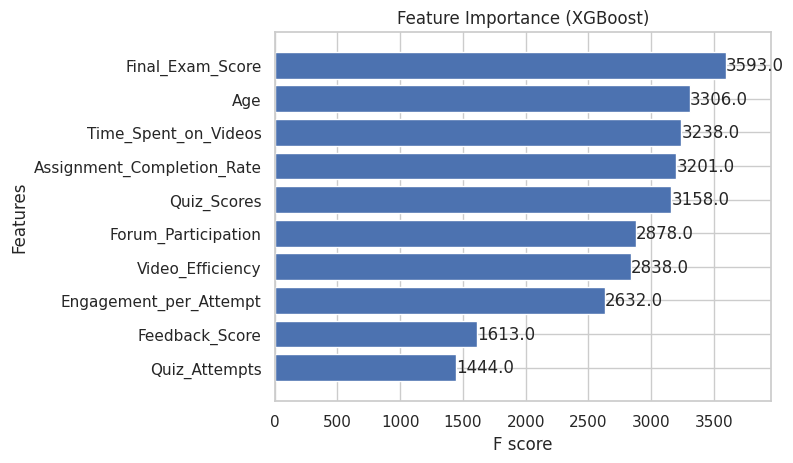

In [ ]:
import matplotlib.pyplot as plt

# Get the best XGBoost model from the randomized search
best_xgb_model = random_search_xgb.best_estimator_

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, height=0.8)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with the best XGBoost model
cv_scores_xgb = cross_val_score(best_xgb_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Scores for XGBoost: {cv_scores_xgb}")
print(f"Mean Cross-Validation Score: {cv_scores_xgb.mean():.4f}")

Cross-Validation Scores for XGBoost: [0.54244548 0.86682243 0.95638629 0.96573209 0.96534268]
Mean Cross-Validation Score: 0.8593


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = best_xgb_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1623
           1       0.15      0.02      0.04       377

    accuracy                           0.79      2000
   macro avg       0.48      0.50      0.46      2000
weighted avg       0.69      0.79      0.72      2000

Confusion Matrix:
[[1572   51]
 [ 368    9]]


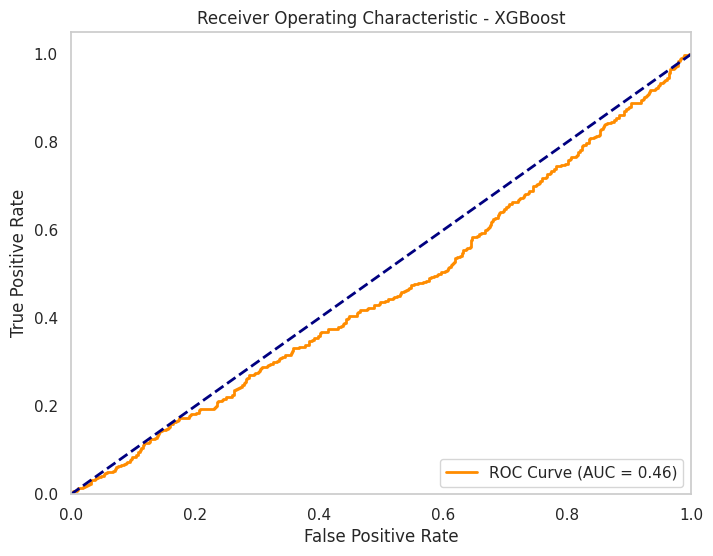

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import joblib

# Save the best XGBoost model to a file
joblib.dump(best_xgb_model, 'best_xgboost_dropout_model.pkl')
print("Model saved as 'best_xgboost_dropout_model.pkl'")

Model saved as 'best_xgboost_dropout_model.pkl'


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define a small hyperparameter grid
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Base model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Randomized Search with 3-fold CV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best model
best_rf_model = random_search_rf.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1623
           1       0.18      0.38      0.24       377

    accuracy                           0.55      2000
   macro avg       0.49      0.48      0.46      2000
weighted avg       0.69      0.55      0.60      2000


Confusion Matrix (Random Forest):
[[953 670]
 [233 144]]


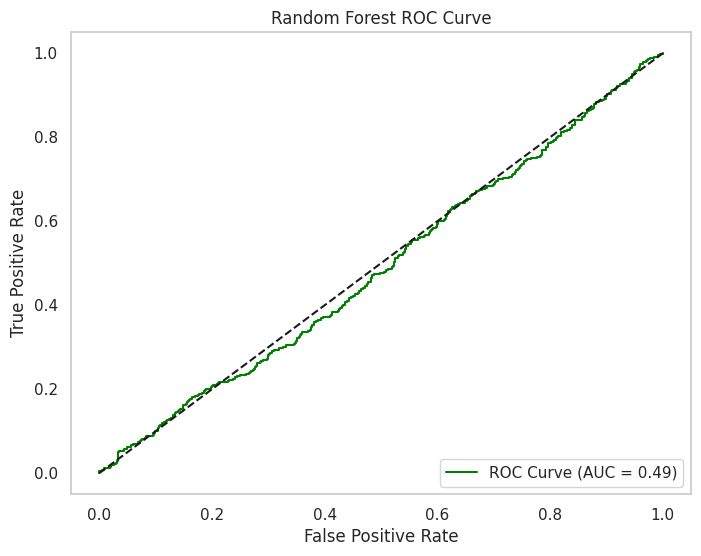

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions and Probabilities
y_pred_rf = best_rf_model.predict(X_test)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Classification Report & Confusion Matrix
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

# Initialize RFECV
rfecv = RFECV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
              step=1,
              cv=5,
              scoring='f1',
              n_jobs=-1,
              verbose=1)

# Fit RFECV to training data
rfecv.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfecv.support_]
print(f"Selected Features ({len(selected_features)}):")
print(selected_features.tolist())

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Selected Features (1):
['Video_Efficiency']


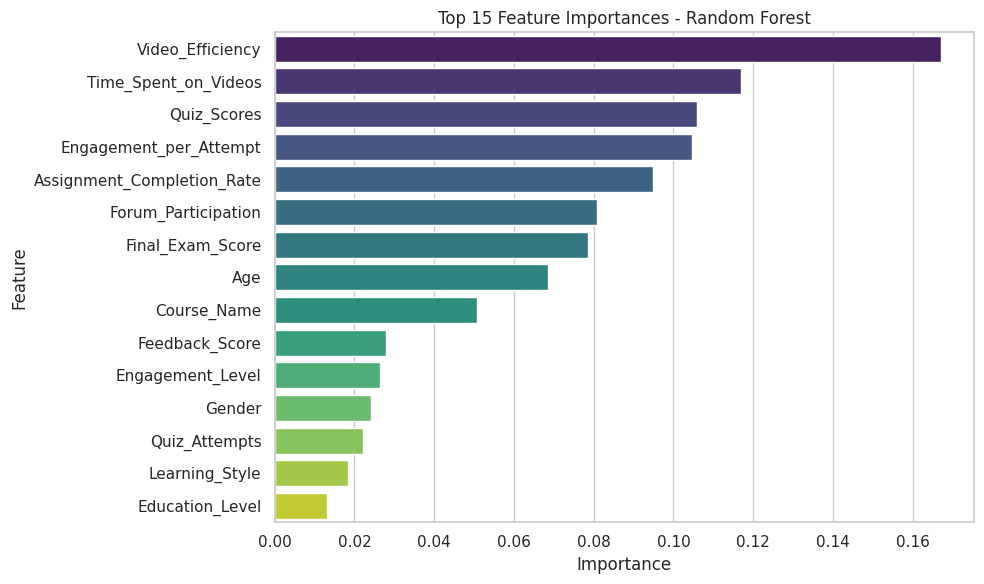

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_random_forest_dropout_model.pkl')
print("Model saved as 'best_random_forest_dropout_model.pkl'")

Model saved as 'best_random_forest_dropout_model.pkl'


# Step 9: Threshold Adjustment

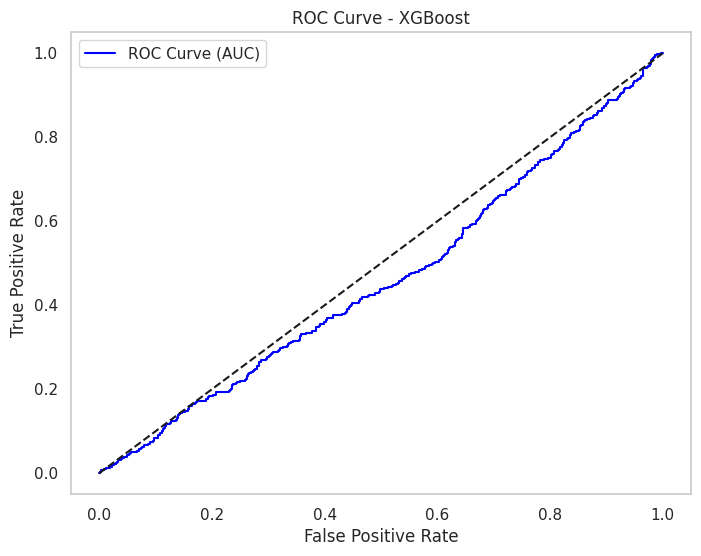

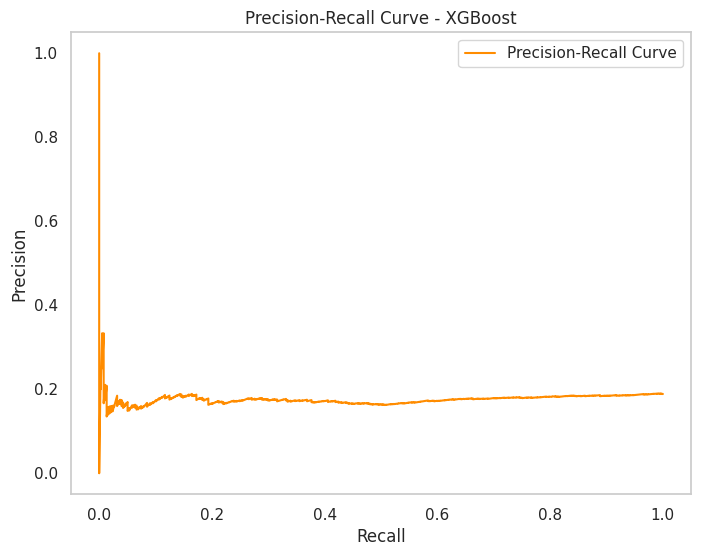

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities from XGBoost model
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba_xgb)

# Precision-Recall Curve
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC)', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve', color='darkorange')
plt.title('Precision-Recall Curve - XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Add probabilities to test DataFrame for easier exploration
X_test_copy = X_test.copy()
X_test_copy['true_label'] = y_test.values
X_test_copy['dropout_proba'] = y_proba_xgb

# Sort by predicted dropout probability (descending) where label is 0 (not dropped out)
at_risk_students = X_test_copy[(X_test_copy['true_label'] == 0)].sort_values(by='dropout_proba', ascending=False)

# Pick one student near borderline (e.g., high dropout probability but actual No)
sample_student = at_risk_students.iloc[0]
print(sample_student)

Age                          -1.007509
Gender                        0.000000
Education_Level               0.000000
Course_Name                   1.000000
Time_Spent_on_Videos          1.324571
Quiz_Attempts                 1.335755
Quiz_Scores                   0.612250
Forum_Participation          -0.740859
Assignment_Completion_Rate    1.005374
Engagement_Level              2.000000
Final_Exam_Score              0.612229
Learning_Style                1.000000
Feedback_Score               -0.712420
Engagement_per_Attempt       -0.930373
Video_Efficiency             -0.685181
true_label                    0.000000
dropout_proba                 0.648402
Name: 5968, dtype: float64


In [ ]:
# Inverse transform to get actual values
X_test_actual = X_test.copy()
X_test_actual[numerical_cols] = scaler.inverse_transform(X_test[numerical_cols])

# Add labels and dropout probability
X_test_actual['true_label'] = y_test.values
X_test_actual['dropout_proba'] = y_proba_xgb

# Identify the at-risk non-dropout student
at_risk_students_actual = X_test_actual[X_test_actual['true_label'] == 0] \
    .sort_values(by='dropout_proba', ascending=False)

sample_student_actual = at_risk_students_actual.iloc[0]
print(sample_student_actual)

Age                            22.000000
Gender                          0.000000
Education_Level                 0.000000
Course_Name                     1.000000
Time_Spent_on_Videos          443.000000
Quiz_Attempts                   4.000000
Quiz_Scores                    77.000000
Forum_Participation            14.000000
Assignment_Completion_Rate     87.000000
Engagement_Level                2.000000
Final_Exam_Score               77.000000
Learning_Style                  1.000000
Feedback_Score                  2.000000
Engagement_per_Attempt          2.800000
Video_Efficiency                0.195946
true_label                      0.000000
dropout_proba                   0.648402
Name: 5968, dtype: float64


In [ ]:
import shap

# 1. Get the position/index (not label) of the target sample (e.g. index 5968)
target_index_label = 5968
target_position = X_test.index.get_loc(target_index_label)

# 2. Compute SHAP values
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

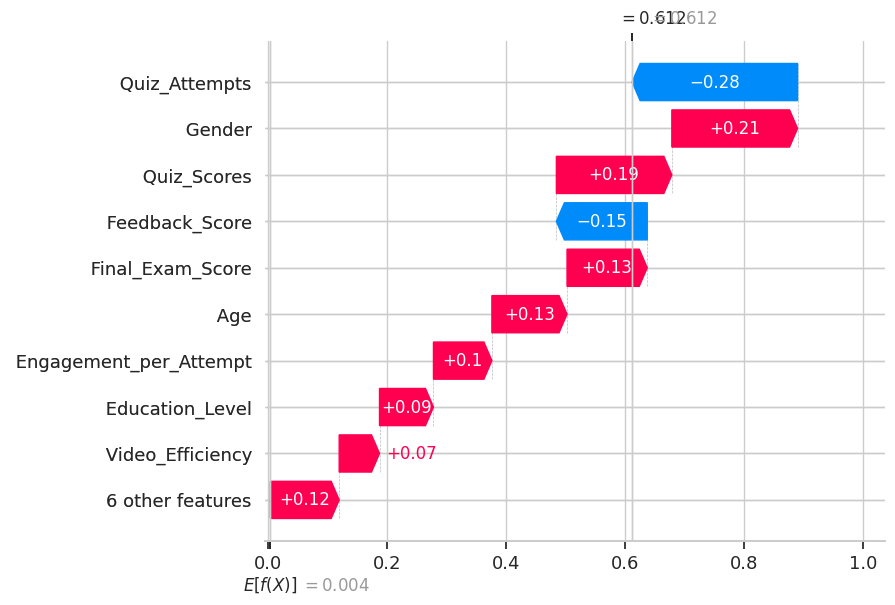

In [ ]:
import matplotlib.pyplot as plt

# Bar plot showing feature impact for one instance
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[target_position],
    X_test.iloc[target_position]
)

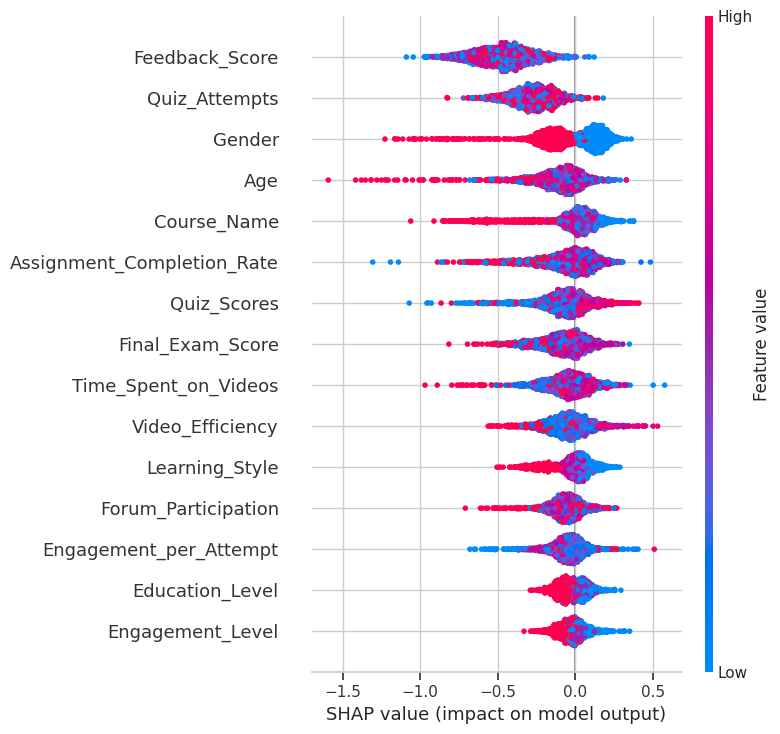

In [ ]:
# Overview: Feature importance across test set
shap.summary_plot(shap_values, X_test)

In [ ]:
# Modify the student's feature slightly
modified_student = X_test.loc[at_risk_students.index[0]].copy()

# Let's say 'Feedback_Score' is low (SHAP indicates it's risky)
# Try increasing it a bit to simulate an improvement
modified_student['Feedback_Score'] += 10
modified_student['Feedback_Score'] = min(modified_student['Feedback_Score'], 1.0)  # Cap at 1.0 if scaled

# Re-predict
new_proba = best_xgb_model.predict_proba(modified_student.values.reshape(1, -1))[0][1]
print(f" New dropout probability after tweak: {new_proba:.4f}")

 New dropout probability after tweak: 0.9715
